In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format
!unzip az-handwritten-alphabets-in-csv-format.zip -d alphabet_data

Dataset URL: https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
License(s): CC0-1.0
 68% 125M/185M [00:00<00:00, 1.30GB/s]
100% 185M/185M [00:00<00:00, 893MB/s] 
Archive:  az-handwritten-alphabets-in-csv-format.zip
  inflating: alphabet_data/A_Z Handwritten Data.csv  
  inflating: alphabet_data/A_Z Handwritten Data/A_Z Handwritten Data.csv  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import tensorflow as tf

In [ ]:
data = pd.read_csv("alphabet_data/A_Z Handwritten Data.csv").astype('float32')
print(data.shape)

(372450, 785)


In [ ]:
X = data.drop('0', axis=1).values   # pixel values
y = data['0'].values                # labels (0–25)

# Normalize pixel values
X = X / 255.0

# Reshape for CNN input (28x28x1)
X = X.reshape(-1, 28, 28, 1)

# One-hot encode labels
y = to_categorical(y, num_classes=26)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (297960, 28, 28, 1)
Testing data: (74490, 28, 28, 1)


In [ ]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │        13,338 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,563,162 (5.96 MB)

 Trainable params: 1,563,162 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=128
)

Epoch 1/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 1064s 456ms/step - accuracy: 0.9133 - loss: 0.3048 - val_accuracy: 0.9853 - val_loss: 0.0514
Epoch 2/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 1145s 475ms/step - accuracy: 0.9860 - loss: 0.0492 - val_accuracy: 0.9900 - val_loss: 0.0359
Epoch 3/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 1078s 463ms/step - accuracy: 0.9903 - loss: 0.0327 - val_accuracy: 0.9914 - val_loss: 0.0327
Epoch 4/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 1081s 454ms/step - accuracy: 0.9927 - loss: 0.0236 - val_accuracy: 0.9911 - val_loss: 0.0318
Epoch 5/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 1073s 442ms/step - accuracy: 0.9949 - loss: 0.0167 - val_accuracy: 0.9935 - val_loss: 0.0243
Epoch 6/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 1014s 430ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9947 - val_loss: 0.0236
Epoch 7/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 1071s 442ms/step - accuracy: 0.9965 - loss: 0.0110 - val_accuracy: 0.9947 - val_loss: 0.0240
Epoch 8/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 1021s 433ms/s

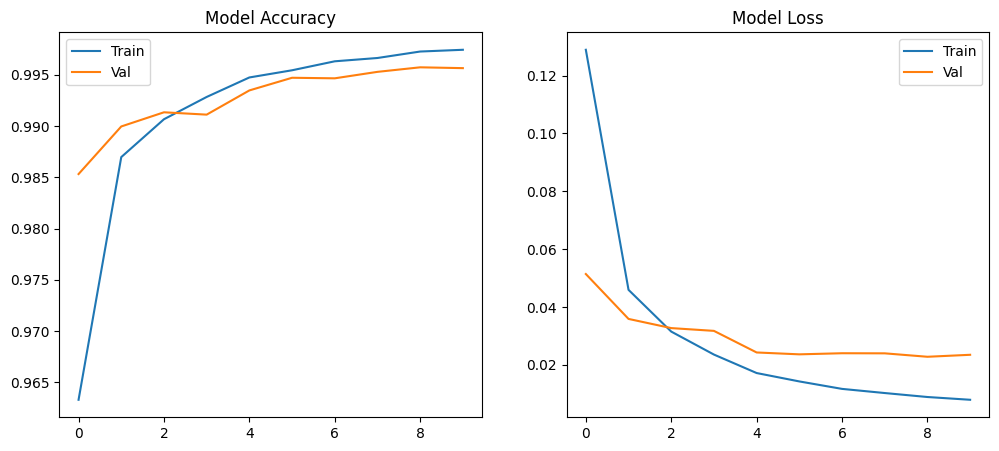

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Model Loss')
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.preprocessing import image

img = image.load_img('m.webp', target_size=(28,28), color_mode='grayscale')
x = image.img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0)

prediction = model.predict(x)
predicted_label = np.argmax(prediction)
print("Predicted Alphabet:", chr(predicted_label + 65))  # 65 -> ASCII of 'A'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Alphabet: M
